In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:

from sklearn.model_selection import train_test_split

In [5]:
sns.set(color_codes=True)

In [6]:
import pandas as pd
url = 'https://media.githubusercontent.com/media/fivethirtyeight/data/master/science-giving/science_federal_giving.csv'
c=pd.read_csv(url)

E:\program_files\Anaconda3\envs\my-rdkit-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,25,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
pd.set_option('display.max_columns', 500)

In [8]:
data_df=pd.DataFrame(c)

In [9]:
data_df.head()

,cmte_nm,cmte_id,cmte_tp,cmte_pty,cand_name,cand_pty_affiliation,cand_office_st,cand_office,cand_office_district,cand_status,rpt_tp,transaction_pgi,transaction_tp,entity_tp,cleaned_name,city,state,zip_code,employer,cleanedoccupation,classification,transaction_dt,cycle,transaction_amt,2016_dollars,other_id,tran_id,file_num,memo_cd,memo_text,sub_id
0,AMERICAN WAY - DURANT 2012; THE,C00501452,S,REP,"DURANT, CLARK",REP,MI,S,0.0,C,Q1,P,15,IND,"TREHARNE, WILLIAM H",TROY,MI,48098,MIDWEST STEEL,ENGINEER,Engineer,3302012.0,2012.0,2500.0,2612.50,NaN,SA0108160812336,845273.0,NaN,NaN,1.010000e+18
1,A LOT OF PEOPLE FOR DAVE OBEY,C00017830,H,DEM,"OBEY, DAVID R",DEM,WI,H,7.0,C,Q2,P,15,IND,"MCGOVERN, THOMAS",TUCSON,AZ,85750,MMLA PSOMAS INC,CIVIL ENGINEER,Engineer,4182007.0,2008.0,250.0,292.50,NaN,C34559,294636.0,NaN,NaN,4.070000e+18
2,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,3.0,C,Q2,P,15E,IND,"OFFNER, CARL",SUDBURY,MA,17761369,AB INITIO SOFTWARE,ENGINEER (SOFTWARE),Engineer,6092016.0,2016.0,50.0,50.00,C00401224,VSH8VCDY4S4,1096417.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.080000e+18
3,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,3.0,C,Q3,P,15,IND,"WARNER, RICHARD",ARLINGTON,TX,76015,SDS,ENGINEER (SOFTWARE),Engineer,8192012.0,2012.0,2500.0,2612.50,NaN,C6548162,863428.0,NaN,NaN,4.030000e+18
4,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,7.0,C,30G,G,15,IND,"POLT, ROBIN",NaN,NaN,NaN,UNIVERSITY OF ARIZONA,(CHEMIST),Scientist,10292010.0,2010.0,250.0,273.25,NaN,C5156783,863417.0,NaN,NaN,4.030000e+18


In [10]:
#check_data=data_df[data_df['city'].str.contains("UCO",na=False)]

In [11]:
#check_data.shape

In [78]:
#numpy.mean(data_df['transaction_amt'])
numpy.var(data_df['transaction_amt'])

614564.6822520043

In [12]:
data_df_no_UCO=data_df[~data_df.city.str.contains("UCO",na=False)] #No entries should have the letter sequence “UCO” in the “city” field. 

In [13]:
data_df_no_UCO.classification.value_counts()

Engineer     345369
Scientist    111601
Math-Stat     13101
Name: classification, dtype: int64

In [14]:
345369/111601

3.094676570998468

In [15]:
1/8

0.125

In [16]:
first_sample=data_df_no_UCO.sample(n = 100000,replace=False) 

In [29]:
first_sample.shape

(100000, 31)

In [24]:
# generate small sample testing
second_sample=data_df_no_UCO.sample(n = 50,replace=False)

In [25]:
second_sample

,cmte_nm,cmte_id,cmte_tp,cmte_pty,cand_name,cand_pty_affiliation,cand_office_st,cand_office,cand_office_district,cand_status,rpt_tp,transaction_pgi,transaction_tp,entity_tp,cleaned_name,city,state,zip_code,employer,cleanedoccupation,classification,transaction_dt,cycle,transaction_amt,2016_dollars,other_id,tran_id,file_num,memo_cd,memo_text,sub_id
508699,DCCC,C00000935,Y,DEM,NaN,NaN,NaN,NaN,NaN,NaN,M8,P,15,IND,"NAYAK, PARIKSHITA",TROY,MI,480853203,GALA AND ASSOC,ENGINEER,Engineer,7202016.0,2016.0,250.0,250.00,NaN,VT4C3RDSCP9,1095978.0,NaN,NaN,4.090000e+18
545896,DSCC,C00042366,Y,DEM,NaN,NaN,NaN,NaN,NaN,NaN,M10,P,15,IND,"ALTSTEIN, LILY",CAMBRIDGE,MA,21383012,BULLFINCH TEMPS,BIOSTATISTICS,Math-Stat,9292016.0,2016.0,50.0,50.00,NaN,SA1121167593118,1126506.0,NaN,NaN,1.120000e+18
620457,JILL STEIN FOR PRESIDENT,C00581199,P,GRE,"STEIN, JILL",GRE,US,P,0.0,C,30G,G,15,IND,"HEER, JONATHAN",HOPKINS,MN,55343,LANDIS+GYR,ENGINEER (SOFTWARE),Engineer,11232016.0,2016.0,500.0,500.00,NaN,SA17A.189601,1134336.0,NaN,NaN,4.120000e+18
852246,TEXANS FOR SENATOR JOHN CORNYN INC,C00369033,S,REP,"CORNYN, JOHN",REP,TX,S,0.0,C,Q1,P,15,IND,"MARTINEAU, DAVID F",DALLAS,TX,75225,PITTS OIL COMPANY,GEOLOGIST,Scientist,2252008.0,2008.0,200.0,224.40,NaN,SA04291450081260,336613.0,NaN,NaN,1.120000e+18
747520,JOHN MCCAIN 2008 INC.,C00430470,P,REP,"MCCAIN, JOHN S",REP,US,P,0.0,C,M6,P,15,IND,"KUYKENDALL, STEVEN E. MRS.",BATESVILLE,AR,72501,SELF-EMPLOYED,''DOMESTIC ENGINEER!'',Engineer,5022008.0,2008.0,250.0,280.50,NaN,SA17.866297,876930.0,NaN,NaN,4.070000e+18
236962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506342,BERNIE 2016,C00577130,P,DEM,"SANDERS, BERNARD",DEM,US,P,0.0,C,M6,P,15E,IND,"CARR, KEVIN",WALTHAM,MA,24526350,MASSDOT,CIVIL ENGINEER,Engineer,5142016.0,2016.0,25.0,25.00,C00401224,VPF7BPNQ184,1094141.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.080000e+18
443058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807922,RICK SANTORUM FOR PRESIDENT INC.,C00496034,P,REP,"SANTORUM, RICHARD J.",REP,US,P,0.0,C,M4,P,15,IND,"DOUGHTERY, ROBERT D. MR.",GREAT BEND,KS,67530,SELF-EMPLOYED,GEOLOGIST,Scientist,3212012.0,2012.0,500.0,522.50,NaN,SA17.854570,780310.0,NaN,NaN,4.040000e+18
719182,GREEN PARTY OF THE UNITED STATES,C00370221,X,GRE,NaN,NaN,NaN,NaN,NaN,NaN,12G,P,15,IND,"MUNYAK, EDWARD",LOS ALTOS,CA,94022,SELF,ENGINEER,Engineer,10122012.0,2012.0,200.0,209.00,NaN,SA11AI.129453,873724.0,NaN,NaN,4.060000e+18


In [17]:
first_sample.classification.value_counts()

Engineer     39419
Scientist    12630
Math-Stat     1456
Name: classification, dtype: int64

In [18]:
39202/12486

3.1396764376101234

In [19]:
first_sample.state.value_counts()

CA    11582
TX     4443
NY     2910
WA     2848
MA     2799
MD     1977
CO     1825
VA     1732
IL     1712
PA     1619
FL     1601
NJ     1503
MI     1101
OR     1046
OH      992
NC      990
AZ      956
GA      915
MN      772
NM      746
WI      702
CT      624
IN      552
MO      539
TN      483
OK      445
NH      440
AL      433
LA      421
UT      375
KS      333
SC      324
IA      322
KY      320
DC      318
NV      297
AK      235
HI      219
VT      214
ME      188
RI      181
MS      168
NE      150
DE      145
ID      143
WV      136
AR      130
MT      124
WY      110
SD       86
PR       66
ZZ       55
ND       50
AE       21
AP       11
GU        5
VI        4
AA        1
Name: state, dtype: int64

In [30]:
first_sample_MA_part=first_sample[first_sample['state']=='MA']

In [31]:
first_sample_MA_part.shape

(2799, 31)

In [41]:
first_sample_MA_part.classification.value_counts()

Engineer     1909
Scientist     839
Math-Stat      51
Name: classification, dtype: int64

In [42]:
1909/839

2.2753277711561384

In [46]:
first_sample_MA_part['classification_str']=str(first_sample_MA_part['classification'])

E:\program_files\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
extend_MA.shape

(500000, 31)

In [36]:
first_sample__NOT_MA_part=first_sample[first_sample['state'] != 'MA']

In [39]:
extend_NO_MA=first_sample__NOT_MA_part.sample(n = 500000,replace=True) 

In [65]:
extend_NO_MA.shape

(500000, 31)

In [66]:
combine_MA_NO_MA=pd.concat([extend_NO_MA, extend_MA], axis=0)

In [86]:
# check how many of the rows are not null
combine_MA_NO_MA.transaction_amt.notnull().sum()

761031

In [67]:
combine_MA_NO_MA.shape

(1000000, 31)

In [68]:
combine_MA_NO_MA.classification.value_counts()

Engineer     533413
Scientist    211283
Math-Stat     16335
Name: classification, dtype: int64

In [69]:
533413/211283

2.5246375714089635

In [70]:
2.5*1.2

3.0

In [73]:
import numpy

In [74]:
numpy.mean(['transaction_amt'])

251.83970035386207

In [76]:
numpy.mean(combine_MA_NO_MA['transaction_amt'])

251.83970035386207

In [83]:
numpy.median(combine_MA_NO_MA['transaction_amt'])

E:\program_files\Anaconda3\envs\my-rdkit-env\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


nan

In [79]:
numpy.var(combine_MA_NO_MA['transaction_amt'])

295498.59678983537

In [75]:
combine_MA_NO_MA['transaction_amt'].isnull().sum()

238969

In [158]:
combine_MA_NO_MA.classification.value_counts()

Engineer     533413
Scientist    211283
Math-Stat     16335
Name: classification, dtype: int64

In [82]:
combine_MA_NO_MA.describe()

,cand_office_district,transaction_dt,cycle,transaction_amt,2016_dollars,file_num,sub_id
count,628224.000000,7.610290e+05,761029.000000,761031.000000,761019.000000,7.610310e+05,7.610310e+05
mean,1.121025,7.080199e+06,2014.197964,251.839700,266.403291,9.656770e+05,3.603291e+18
std,4.222546,3.214057e+06,2.828091,543.598183,576.539975,2.294521e+05,1.007897e+18
min,0.000000,1.012008e+06,2006.000000,-5400.000000,-5400.000000,2.779430e+05,1.010000e+18
25%,0.000000,4.152016e+06,2012.000000,27.000000,27.000000,8.966930e+05,4.010000e+18
50%,0.000000,8.012008e+06,2016.000000,100.000000,100.000000,1.077572e+06,4.050000e+18
75%,0.000000,1.009202e+07,2016.000000,250.000000,280.500000,1.121259e+06,4.080000e+18
max,53.000000,1.231202e+07,2016.000000,35000.000000,35000.000000,1.153806e+06,4.120000e+18


In [80]:
combine_MA_NO_MA_not_null=combine_MA_NO_MA[combine_MA_NO_MA['transaction_amt'].notnull()]

In [84]:
(combine_MA_NO_MA_not_null['transaction_amt']).median()

100.0

In [87]:
numpy.var(combine_MA_NO_MA['transaction_amt'])

295498.59678983537

In [81]:
numpy.var(combine_MA_NO_MA_not_null['transaction_amt'])

295498.5967898355

In [88]:
numpy.mean(combine_MA_NO_MA_not_null['transaction_amt'])

251.83970035386207

In [89]:
numpy.mean(combine_MA_NO_MA['transaction_amt'])

251.83970035386207

In [90]:
# to check if there is negative values of transaction_amt
check_zero=combine_MA_NO_MA[combine_MA_NO_MA['transaction_amt']<0]

In [91]:
check_zero

,cmte_nm,cmte_id,cmte_tp,cmte_pty,cand_name,cand_pty_affiliation,cand_office_st,cand_office,cand_office_district,cand_status,rpt_tp,transaction_pgi,transaction_tp,entity_tp,cleaned_name,city,state,zip_code,employer,cleanedoccupation,classification,transaction_dt,cycle,transaction_amt,2016_dollars,other_id,tran_id,file_num,memo_cd,memo_text,sub_id
796166,OBAMA FOR AMERICA,C00431445,P,DEM,"OBAMA, BARACK",DEM,US,P,0.0,C,Q3,P,15,IND,"PETERSON, KYLE",SEATTLE,WA,98126,AMAZON.COM,SOFTWARE DEVELOPMENT ENGINEER,Engineer,9302007.0,2008.0,-250.0,-292.500,NaN,518604RMIN,359397.0,NaN,REDESIGNATION FROM,4.090000e+18
622440,JOHN MCCAIN 2008 INC.,C00430470,P,REP,"MCCAIN, JOHN S",REP,US,P,0.0,C,12G,P,15,IND,"HARRINGTON, DONALD J. MR.",FORT WALTON BEACH,FL,32547,TYBRIN CORPORATION,ENGINEER & MANAGER,Engineer,10142008.0,2008.0,-200.0,-224.400,NaN,SA17.2559964,876991.0,X,REDESIGNATION TO GELAC,4.070000e+18
803109,ROMNEY FOR PRESIDENT INC.,C00431171,P,REP,"ROMNEY, MITT",REP,US,P,0.0,C,M8,P,15,IND,"KEIG, RICHIE M. MR.",HOUSTON,TX,77065,MCDERMOTT INC.,ENGINEER,Engineer,7062012.0,2012.0,-500.0,-522.500,NaN,SA17.1422972B,944286.0,X,REATTRIBUTION TO SPOUSE,4.080000e+18
704230,RICKPERRY.ORG INC,C00500587,P,REP,"PERRY, JAMES R (RICK)",REP,US,P,0.0,P,YE,P,15,IND,"CELAURO, F. PAUL MR.",HOUSTON,TX,77056,DANNENBAUM ENGINEERING,ENGINEER,Engineer,10282011.0,2012.0,-2500.0,-2690.000,NaN,SA17A.28940,845029.0,X,NaN,4.010000e+18
746789,RUSS FOR WISCONSIN,C00578013,S,DEM,"FEINGOLD, RUSSELL D",DEM,WI,S,0.0,C,Q1,P,15E,IND,"WELLAND, DAVID",AUSTIN,TX,7.87052e+08,SILICON LABORATORIES,ENGINEER,Engineer,3312016.0,2016.0,-2700.0,-2700.000,C00401224,SA050416097912350,1066888.0,X,MEMO ITEM,1.030000e+18
670102,OBAMA FOR AMERICA,C00431445,P,DEM,"OBAMA, BARACK",DEM,US,P,0.0,C,M8,P,15,IND,"LEWIS, GREGORY",BERKELEY,CA,94705,AEROSOL DYNAMICS INC,RESEARCH SCIENTIST,Scientist,7212008.0,2008.0,-250.0,-280.500,NaN,4713957RMIN,753761.0,NaN,REDESIGNATION FROM,4.110000e+18
768004,LINCOLN DAVIS FOR CONGRESS,C00365015,H,DEM,"DAVIS, LINCOLN EDWARD",DEM,TN,H,4.0,C,Q2,P,15,IND,"HAILEY, JAMES C. MR.",NASHVILLE,TN,37205,SELF-EMPLOYED,ENGINEER,Engineer,6202008.0,2008.0,-2000.0,-2244.000,NaN,SA11AI.20829,362388.0,NaN,NaN,4.090000e+18
859719,BILL OWENS FOR CONGRESS,C00464495,H,DEM,"OWENS, WILLIAM",DEM,NY,H,21.0,C,Q3,P,15,IND,"STEVENS, SCOTT PE",LAKE PLACID,NY,12946,DIMENSION FABRICATORS INC,CIVIL ENGINEER,Engineer,7012012.0,2012.0,-2500.0,-2612.500,NaN,C2901801,818814.0,X,* 04585D,4.110000e+18
479628,CAPITO FOR WEST VIRGINIA,C00539825,S,REP,"CAPITO, SHELLEY MOORE",REP,WV,S,0.0,C,Q1,P,15,IND,"PETERS, WILLIAM J MR",WINFIELD,WV,25213,POWELL COMPANIES,ENGINEER,Engineer,3132013.0,2014.0,-5000.0,-5145.000,NaN,SA0425090914455,868880.0,X,REATTRIBUTED TO GLENDA PETERS [MEMO ITEM] REAT...,2.040000e+18
630620,CRUZ FOR PRESIDENT,C00574624,P,REP,"CRUZ, RAFAEL EDWARD ""TED""",REP,US,P,0.0,C,M6,P,15,IND,"DOMSA, SORIN M.",KEW GARDENS,NY,1.14152e+08,BAE SYSTEMS,ENGINEER,Engineer,5032016.0,2016.0,-35.0,-35.000,NaN,SA17A.1835054,1079356.0,X,REDESIGNATION TO GENERAL,4.060000e+18


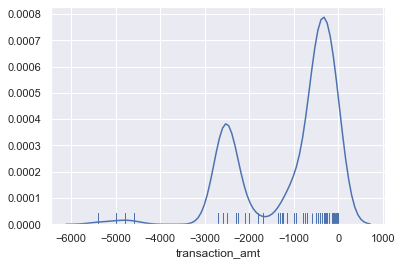

In [92]:
# check the distribution of  negative values 
sns.distplot(check_zero['transaction_amt'], hist=False, rug=True)

In [93]:
import math
math.sqrt(295498)

543.5972774030422

In [ ]:
# since now the average of 1 million records is 251 and  standard deviation is 543.597
# in order to keep as much as original values , I took the number is in range of 3 sigma away from  100 
# which is 251-30 and 251+30  (221,281)

In [118]:
combine_MA_NO_MA.transaction_amt.describe()

count    761031.000000
mean        251.839700
std         543.598183
min       -5400.000000
25%          27.000000
50%         100.000000
75%         250.000000
max       35000.000000
Name: transaction_amt, dtype: float64

In [100]:
combine_MA_NO_MA_within_3sigma=combine_MA_NO_MA[combine_MA_NO_MA['transaction_amt'].between(70, 130, inclusive=True)]

In [114]:
combine_MA_NO_MA_within_3sigma=combine_MA_NO_MA[combine_MA_NO_MA['transaction_amt'].between(70, 130)]

In [129]:
combine_MA_NO_MA_within_3sigma.transaction_amt.describe()

count    94193.000000
mean        98.331872
std          8.134593
min         70.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        130.000000
Name: transaction_amt, dtype: float64

In [159]:
combine_MA_NO_MA_within_3sigma.classification.value_counts()

Engineer     69715
Scientist    22470
Math-Stat     2008
Name: classification, dtype: int64

In [127]:
combine_MA_NO_MA.shape

(1000000, 31)

In [165]:
combine_MA_NO_MA_copy=combine_MA_NO_MA

In [174]:
combine_MA_NO_MA_copy.head()

,cmte_nm,cmte_id,cmte_tp,cmte_pty,cand_name,cand_pty_affiliation,cand_office_st,cand_office,cand_office_district,cand_status,rpt_tp,transaction_pgi,transaction_tp,entity_tp,cleaned_name,city,state,zip_code,employer,cleanedoccupation,classification,transaction_dt,cycle,transaction_amt,2016_dollars,other_id,tran_id,file_num,memo_cd,memo_text,sub_id
629376,CRUZ FOR PRESIDENT,C00574624,P,REP,"CRUZ, RAFAEL EDWARD ""TED""",REP,US,P,0.0,C,M5,P,15,IND,"HOIBERG, RICHARD B.",HILLSBORO,OR,9.71247e+08,EBAY INC.,ENGINEER (SOFTWARE),Engineer,4052016.0,2016.0,50.0,50.0,NaN,SA17A.1596729,1135630.0,NaN,NaN,4.010000e+18
109672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31172,BERNIE 2016,C00577130,P,DEM,"SANDERS, BERNARD",DEM,US,P,0.0,C,M4,P,15,IND,"SOGUE, SALLY",CENTENNIAL,CO,800154865,VEOLIA,(CHEMIST),Scientist,3132016.0,2016.0,50.0,50.0,NaN,VPF7BMBQ5Y6,1066824.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.050000e+18
151686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
combine_MA_NO_MA_copy['transaction_amt']=combine_MA_NO_MA_copy['transaction_amt'].fillna(0)

In [179]:
combine_MA_NO_MA_copy.head()

,cmte_nm,cmte_id,cmte_tp,cmte_pty,cand_name,cand_pty_affiliation,cand_office_st,cand_office,cand_office_district,cand_status,rpt_tp,transaction_pgi,transaction_tp,entity_tp,cleaned_name,city,state,zip_code,employer,cleanedoccupation,classification,transaction_dt,cycle,transaction_amt,2016_dollars,other_id,tran_id,file_num,memo_cd,memo_text,sub_id
629376,CRUZ FOR PRESIDENT,C00574624,P,REP,"CRUZ, RAFAEL EDWARD ""TED""",REP,US,P,0.0,C,M5,P,15,IND,"HOIBERG, RICHARD B.",HILLSBORO,OR,9.71247e+08,EBAY INC.,ENGINEER (SOFTWARE),Engineer,4052016.0,2016.0,50.0,50.0,NaN,SA17A.1596729,1135630.0,NaN,NaN,4.010000e+18
109672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31172,BERNIE 2016,C00577130,P,DEM,"SANDERS, BERNARD",DEM,US,P,0.0,C,M4,P,15,IND,"SOGUE, SALLY",CENTENNIAL,CO,800154865,VEOLIA,(CHEMIST),Scientist,3132016.0,2016.0,50.0,50.0,NaN,VPF7BMBQ5Y6,1066824.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.050000e+18
151686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
combine_MA_NO_MA_within_3sigma['transaction_amt'].describe()

count    94193.000000
mean        98.331872
std          8.134593
min         70.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        130.000000
Name: transaction_amt, dtype: float64

In [181]:
combine_MA_NO_MA_outside_3sigma=combine_MA_NO_MA_copy[(combine_MA_NO_MA_copy.transaction_amt >=130) | (combine_MA_NO_MA_copy.transaction_amt <=70)]

In [182]:
combine_MA_NO_MA_outside_3sigma.classification.value_counts()

Engineer     465019
Scientist    188869
Math-Stat     14327
Name: classification, dtype: int64

In [136]:
#combine_MA_NO_MA_outside_3sigma=pd.DataFrame(combine_MA_NO_MA_outside_3sigma)

In [183]:
combine_MA_NO_MA_outside_3sigma.shape

(907184, 31)

In [184]:
combine_MA_NO_MA_outside_3sigma.classification.value_counts()

Engineer     465019
Scientist    188869
Math-Stat     14327
Name: classification, dtype: int64

In [143]:
907184+94193

1001377

In [185]:
combine_MA_NO_MA_outside_3sigma.head()

,cmte_nm,cmte_id,cmte_tp,cmte_pty,cand_name,cand_pty_affiliation,cand_office_st,cand_office,cand_office_district,cand_status,rpt_tp,transaction_pgi,transaction_tp,entity_tp,cleaned_name,city,state,zip_code,employer,cleanedoccupation,classification,transaction_dt,cycle,transaction_amt,2016_dollars,other_id,tran_id,file_num,memo_cd,memo_text,sub_id
629376,CRUZ FOR PRESIDENT,C00574624,P,REP,"CRUZ, RAFAEL EDWARD ""TED""",REP,US,P,0.0,C,M5,P,15,IND,"HOIBERG, RICHARD B.",HILLSBORO,OR,9.71247e+08,EBAY INC.,ENGINEER (SOFTWARE),Engineer,4052016.0,2016.0,50.0,50.0,NaN,SA17A.1596729,1135630.0,NaN,NaN,4.010000e+18
109672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31172,BERNIE 2016,C00577130,P,DEM,"SANDERS, BERNARD",DEM,US,P,0.0,C,M4,P,15,IND,"SOGUE, SALLY",CENTENNIAL,CO,800154865,VEOLIA,(CHEMIST),Scientist,3132016.0,2016.0,50.0,50.0,NaN,VPF7BMBQ5Y6,1066824.0,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.050000e+18
151686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# since the summation of two normal distribution is another normal distribution with ux+uy,var(x)+var(y)
# so I will generate values in compliment with the combine_MA_NO_MA_within_3sigma,number is 1 million-128646

In [144]:

rand_normal = np.random.normal(100, 10, 907184 )

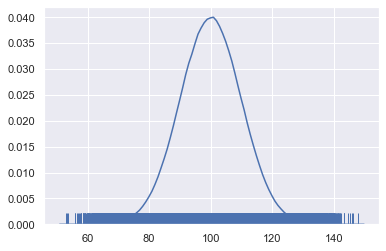

In [99]:
sns.distplot(rand_normal, hist=False, rug=True)

In [186]:
combine_MA_NO_MA_outside_3sigma.transaction_amt=rand_normal

E:\program_files\Anaconda3\envs\my-rdkit-env\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [187]:
combine_MA_NO_MA_outside_3sigma.transaction_amt.describe()

count    907184.000000
mean         99.998628
std          10.008393
min          52.878980
25%          93.244456
50%         100.000133
75%         106.744918
max         147.246745
Name: transaction_amt, dtype: float64

In [188]:
combine_MA_NO_MA_outside_3sigma_and_inside=pd.concat([combine_MA_NO_MA_within_3sigma, combine_MA_NO_MA_outside_3sigma], axis=0)

In [189]:
combine_MA_NO_MA_outside_3sigma_and_inside.shape

(1001377, 31)

In [190]:
combine_MA_NO_MA_outside_3sigma_and_inside_top=combine_MA_NO_MA_outside_3sigma_and_inside.sample(n = 1000000,replace=False) 

In [191]:
combine_MA_NO_MA_outside_3sigma_and_inside_100=combine_MA_NO_MA_outside_3sigma_and_inside.sample(n=100,replace=False)

In [192]:
# add z score of 3 for 100 records
combine_MA_NO_MA_outside_3sigma_and_inside_100.transaction_amt=(numpy.zeros(100) +130)

In [193]:
combine_MA_NO_MA_outside_3sigma_and_inside_100.transaction_amt

796309    130.0
34339     130.0
717306    130.0
202035    130.0
791871    130.0
          ...  
64179     130.0
290673    130.0
609714    130.0
526662    130.0
638185    130.0
Name: transaction_amt, Length: 100, dtype: float64

In [194]:
combine_MA_NO_MA_outside_3sigma_and_inside_final=pd.concat([combine_MA_NO_MA_outside_3sigma_and_inside_top, combine_MA_NO_MA_outside_3sigma_and_inside_100], axis=0)

In [195]:
combine_MA_NO_MA_outside_3sigma_and_inside_final.state.value_counts()

MA    500476
CA     59370
TX     22872
NY     14968
WA     14744
MD     10171
CO      9312
VA      8919
IL      8822
PA      8390
FL      8231
NJ      7656
MI      5632
OR      5302
OH      5177
NC      5170
AZ      4984
GA      4778
MN      3959
NM      3829
WI      3611
CT      3278
IN      2862
MO      2824
TN      2513
OK      2298
NH      2256
LA      2208
AL      2178
UT      1951
SC      1693
IA      1684
DC      1681
KY      1635
KS      1615
NV      1492
AK      1179
HI      1154
VT      1110
RI       979
ME       949
MS       861
DE       813
NE       763
WV       718
ID       701
AR       668
MT       597
WY       555
SD       456
PR       317
ZZ       263
ND       255
AE        94
AP        55
GU        26
VI        21
AA         4
Name: state, dtype: int64

In [196]:
combine_MA_NO_MA_outside_3sigma_and_inside_final.classification.value_counts()

Engineer     534023
Scientist    211095
Math-Stat     16316
Name: classification, dtype: int64

In [197]:
Final_result_data=combine_MA_NO_MA_outside_3sigma_and_inside_final

In [202]:
Final_result_data.to_json('jsonar_result_data.json.gz', orient='records', lines=True, compression='gzip')

In [ ]:
# step B

In [206]:
Final_result_data_scientist_dem=Final_result_data[(Final_result_data['classification']=='Scientist') & (Final_result_data['cand_pty_affiliation']=='DEM')]

In [223]:
Final_result_data_scientist_dem['transaction_amt'].describe()

count    149320.000000
mean         99.934166
std           9.829910
min          57.923936
25%          93.952128
50%         100.000000
75%         106.045240
max         146.885114
Name: transaction_amt, dtype: float64

In [211]:
Final_result_data_scientist_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149320 entries, 607969 to 638185
Data columns (total 31 columns):
cmte_nm                 149320 non-null object
cmte_id                 149320 non-null object
cmte_tp                 149320 non-null object
cmte_pty                149320 non-null object
cand_name               149320 non-null object
cand_pty_affiliation    149320 non-null object
cand_office_st          149320 non-null object
cand_office             149320 non-null object
cand_office_district    149314 non-null float64
cand_status             149292 non-null object
rpt_tp                  149320 non-null object
transaction_pgi         149309 non-null object
transaction_tp          149320 non-null object
entity_tp               149320 non-null object
cleaned_name            149320 non-null object
city                    149314 non-null object
state                   149169 non-null object
zip_code                148858 non-null object
employer                148085 non-nu

In [219]:
149320+617755

767075

In [220]:
149320/767975

0.19443341254598132

In [212]:
Final_result_data_scientist_not_dem=Final_result_data[(Final_result_data['classification']=='Scientist') & (Final_result_data['cand_pty_affiliation'] !='DEM')]

In [213]:
Final_result_data_scientist_not_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61775 entries, 662889 to 601830
Data columns (total 31 columns):
cmte_nm                 61775 non-null object
cmte_id                 61775 non-null object
cmte_tp                 61775 non-null object
cmte_pty                61736 non-null object
cand_name               13845 non-null object
cand_pty_affiliation    13845 non-null object
cand_office_st          13845 non-null object
cand_office             13845 non-null object
cand_office_district    13845 non-null float64
cand_status             13845 non-null object
rpt_tp                  61775 non-null object
transaction_pgi         40936 non-null object
transaction_tp          61775 non-null object
entity_tp               61766 non-null object
cleaned_name            61766 non-null object
city                    61770 non-null object
state                   61752 non-null object
zip_code                61534 non-null object
employer                61425 non-null object
cleanedocc

In [214]:
Final_result_data_not_scientist_dem=Final_result_data[(Final_result_data['classification'] !='Scientist') & (Final_result_data['cand_pty_affiliation']=='DEM')]

In [224]:
Final_result_data_not_scientist_dem['transaction_amt'].describe()

count    383627.000000
mean         99.746522
std           9.745059
min          52.878980
25%          94.053552
50%         100.000000
75%         105.647109
max         147.246745
Name: transaction_amt, dtype: float64

In [215]:
Final_result_data_not_scientist_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383627 entries, 497669 to 526662
Data columns (total 31 columns):
cmte_nm                 383627 non-null object
cmte_id                 383627 non-null object
cmte_tp                 383627 non-null object
cmte_pty                383627 non-null object
cand_name               383627 non-null object
cand_pty_affiliation    383627 non-null object
cand_office_st          383627 non-null object
cand_office             383627 non-null object
cand_office_district    383611 non-null float64
cand_status             383601 non-null object
rpt_tp                  383627 non-null object
transaction_pgi         383588 non-null object
transaction_tp          383627 non-null object
entity_tp               383617 non-null object
cleaned_name            383627 non-null object
city                    383618 non-null object
state                   383517 non-null object
zip_code                383366 non-null object
employer                382994 non-nu

In [221]:
383627+405378 

789005

In [222]:
383627/789005

0.4862161836743747

In [216]:
Final_result_data_not_scientist_not_dem=Final_result_data[(Final_result_data['classification'] !='Scientist') & (Final_result_data['cand_pty_affiliation'] !='DEM')]

In [217]:
Final_result_data_not_scientist_not_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405378 entries, 813003 to 290673
Data columns (total 31 columns):
cmte_nm                 166712 non-null object
cmte_id                 166712 non-null object
cmte_tp                 166712 non-null object
cmte_pty                166663 non-null object
cand_name               81605 non-null object
cand_pty_affiliation    81605 non-null object
cand_office_st          81605 non-null object
cand_office             81605 non-null object
cand_office_district    81605 non-null float64
cand_status             81605 non-null object
rpt_tp                  166712 non-null object
transaction_pgi         131661 non-null object
transaction_tp          166712 non-null object
entity_tp               166712 non-null object
cleaned_name            166712 non-null object
city                    166706 non-null object
state                   166641 non-null object
zip_code                166158 non-null object
employer                165718 non-null obj

In [26]:
# def generate_num():
#     period=0
#     result_sample=second_sample.sample(n = 10,replace=True) 
#     while not (len(result_sample[result_sample['state']=='MA'])== 5):
#         result_sample=second_sample.sample(n = 10,replace=True) 
#     else :
#         return result_sample

In [218]:
import numpy as np
from scipy.stats import chi2_contingency

d = np.array([[149320,383627 ], [61775,405378]])
chi2_contingency(d)

(32718.45675431845, 0.0, 1, array([[112491.19784522, 420455.80215478],
        [ 98603.80215478, 368549.19784522]]))

In [ ]:
#generate_num()

In [ ]:
# check how many samples city name contains UCO

In [44]:
#df_transamt_valid_dict = dict(df_transamt_valid)

In [58]:
#print(df_transamt_valid_dict.keys())

In [59]:
#len(df_transamt_valid_dict)